In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib

#Read the csv file and open the first few rows
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\Housing_Data.csv.xls")

df['DATE'] = pd.to_datetime(df['DATE']).dt.date

df.set_index('DATE', inplace = True) # Set the Index to 'DATE'
df = df.rename(columns={"PRIINCCOU38060": 'data'}, errors="raise") #Rename the PRIINCCOU38060 to 'data'
df.head()



<ipython-input-1-4167524fd286>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,data
DATE,
2016-07-01,740.0
2016-08-01,736.0
2016-09-01,740.0
2016-10-01,696.0
2016-11-01,756.0


 ***We can see we have a date column and a column named data. Lets Plot the data and add a title to it***.

Text(0, 0.5, 'Level')

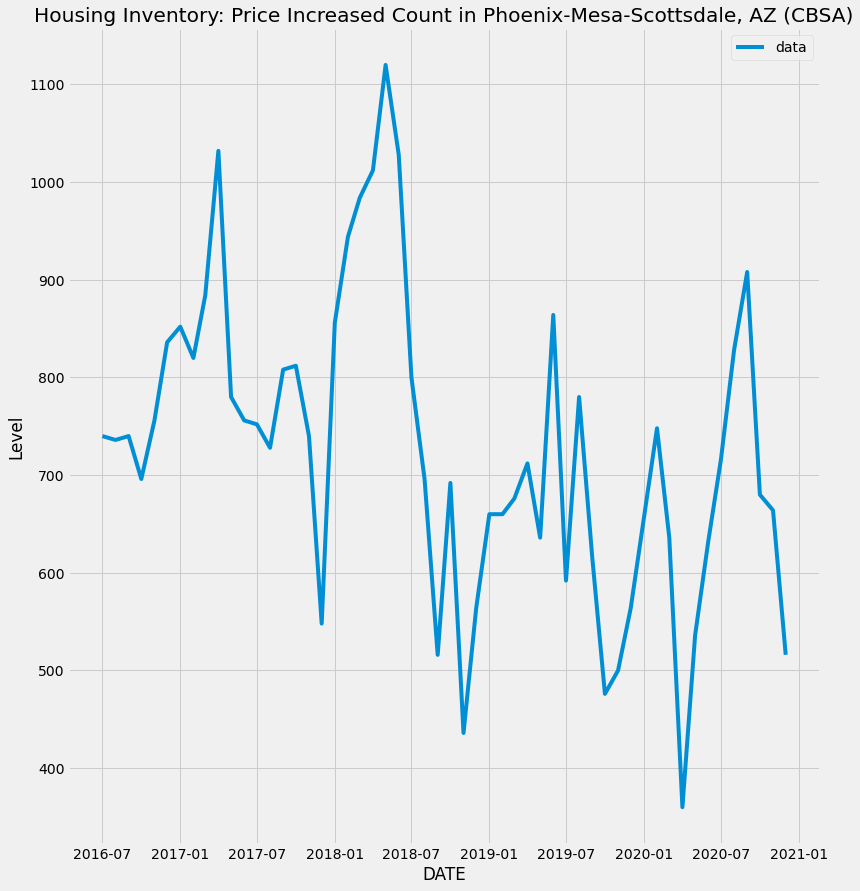

In [2]:
df.plot(figsize=(12,14))
plt.title('Housing Inventory: Price Increased Count in Phoenix-Mesa-Scottsdale, AZ (CBSA)')
plt.ylabel('Level')


*Visualizing time series data is the first thing a data scientist will do to understand patterns, changes over time, unusual observation, outliers, and to see the relationship between different variables*. 
 
*The analysis and insights generated from plot inspection will help not only in building a better forecast but will also lead us to determine the appropriate modeling method*. 

*Here we will first plot the line chart. Line charts are perhaps the most popular and widely used tool to visualize the time series data*.

***Time series data consists of 4 four components***: 

*Trend, Seasonality, Cycles, Random Noise*.

*One of the objectives behind decomposition is to estimate the seasonal effect and present seasonally adjusted values*.

***Additive Model*** – *In an additive model, the components add together*.
*y(t) = level + trend + seasonality + noise*

In [3]:
decompfreq = 12 #Monthly

In [4]:
res = seasonal_decompose(df.interpolate(),
                                freq=decompfreq,
                                model='additive')

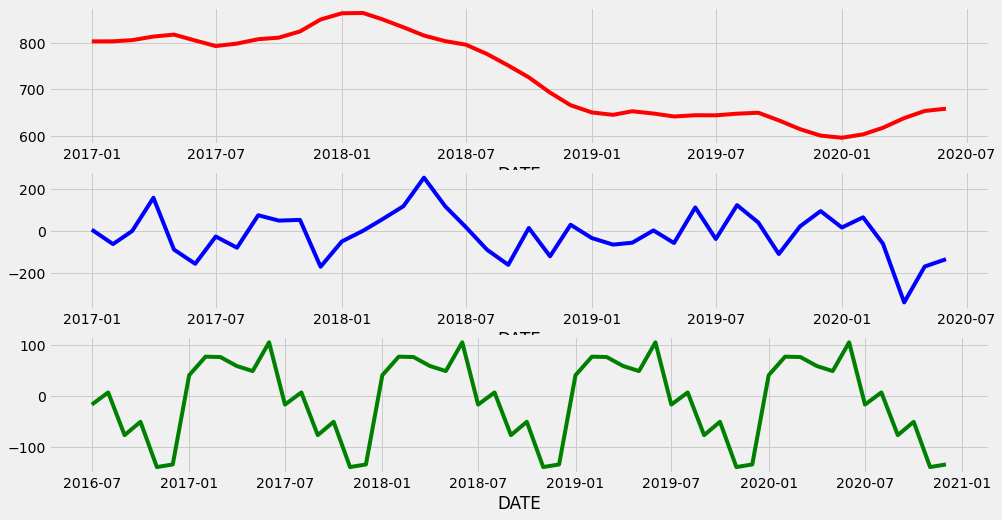

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,color='r')
res.resid.plot(ax=ax2,color='b')
res.seasonal.plot(ax=ax3,color='g')

   *We can see a significant differnce between seasonal, noise and trend*. *Now we will check to see if     we have outliers*

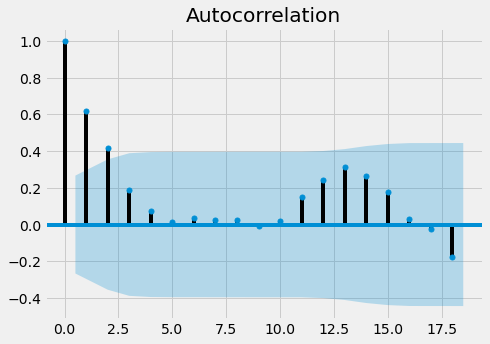

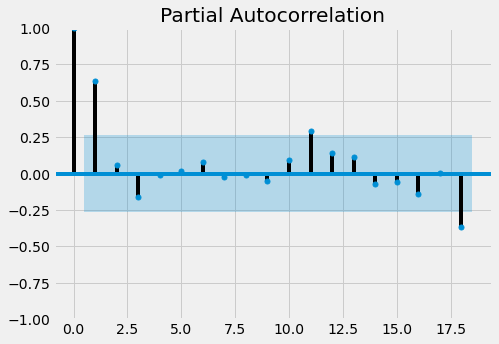

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=7,5
plot_acf(df);
plt.show()
plot_pacf(df);
plt.ylim(-1,1)
plt.show()

**ARIMA stands for Auto Regressive Integrated Moving Average**

*P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation)*

*P helps adjust the line that is being fitted to forecast the series. P is part of the Ar model in Arima*.

*It is also part of the Pacf plot*.

*D = In an ARIMA model we transform a time series into a stationary time series(series without trend or seasonality) using differencing*. 

*D refers to the number of differencing transformations required by the time series to get stationary*.

*D is also the I in Arima model*.

*Q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality*.

*Q is the Ma part of the Arima model. It is also what we use as the ACF Plot*

In [7]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [8]:
y = df['data']

In [9]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:853.3095835202084
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:660.8985874734936
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:550.7485916467394
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:768.9963452844399
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:560.545050394635
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:544.658596499718
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:407.38778251827824
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1288.5420504681128
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:783.3864358263518
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:583.7236363307
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:533.0791683674668
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:383.0487072271149
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:555.3606121809602
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:533.8985639262949
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:402.60980915021037
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:624.040701745357
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:660.420824128646
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:516.155539452406
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:538.039067762402

***FITTING THE ARIMA MODEL***

*It looks like (1,1,0) x (1,1,0,12) is the best fit for our model*.

*With AIC:372.3782967810223 being the lowest*.

In [10]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4225      0.268     -1.576      0.115      -0.948       0.103
ar.S.L12      -0.3108      0.257     -1.208      0.227      -0.815       0.193
sigma2       2.82e+04   8729.775      3.230      0.001    1.11e+04    4.53e+04


*We should always run model diagnostics to investigate any unusual behavior.*

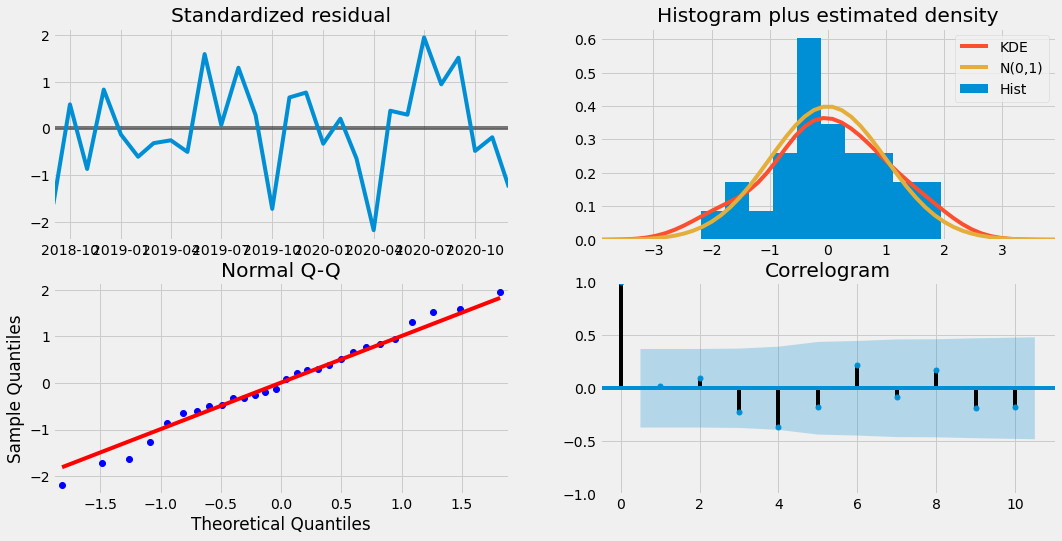

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


*We can see the residuals are very small and that the histogram show a normal distribution of residuals*

***VALIDATING FORECASTS***

*To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series*

*and we set forecasts to start at 2019–11–01 to the end of the data*.

In [12]:
y = df['data']

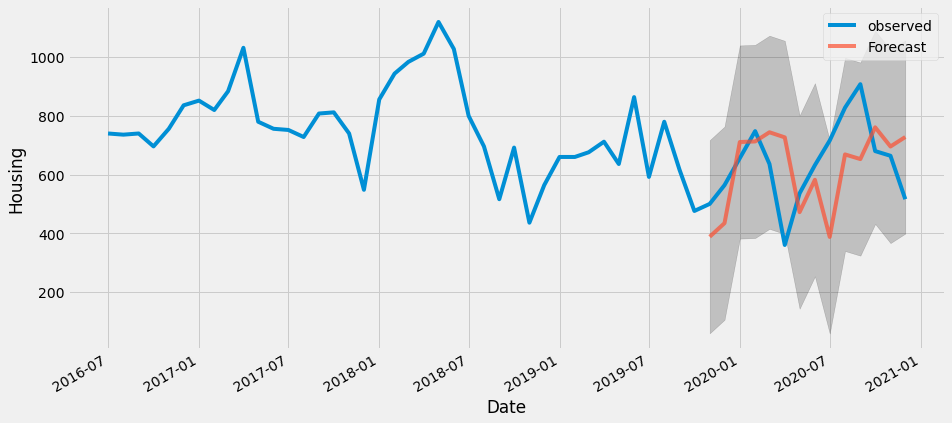

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Housing')
plt.legend()
plt.show()

*This plot is showing the observed values compared to the forecast predictions*. 
*Overall, our forecast shows an upward trend into 2021* 

In [24]:
y_forecasted = pred.predicted_mean
y_truth = y
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecast is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecast is 31239.91


**The Mean Squared Error of our forecast is 31239.91**

*MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set*.

In [25]:
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecast is 176.75


**The Root Mean Squared Error of our forecast is 176.75**

*The root-mean-squared error (RMSE) is a measure of how well your model performed. It does this by measuring difference between predicted values and the actual values.*

*The Root Mean Squared Error(RMSE) tells us that our model was able to forecast the average monthly housing price in the test set within 176.75 of the given market during the month* . 

*The count of listings which have had their price increased in a given market during the month is 390 - 900, Which means the model is working correctly so far*.

*In Conclusion we can see that as inventory gets low, housing prices will continue to grow in an upward trend*.